![legtsgo](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExaWhwb2x2YjA1MjltMm1reTh3MDkzb2FsN21wenE3b2pjdnp4ems4dCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/SvckSy7fFviqrq8ClF/giphy.gif)

<h1 style="color: #00BFFF;">00 | Exploratory Data Analysis (EDA) with Housing Price Dataset</h1>

Exploratory Data Analysis (EDA) is a crucial step in the data analysis pipeline. It helps us understand the data, discover patterns, spot anomalies, and frame hypotheses. In this lesson, we'll use a housing price dataset to explore various EDA techniques.

## Initial Steps for Data Analysis

The initial steps for data analysis in Python include:

1. **Data Acquisition:** This involves gathering data from various sources such as local files, databases, APIs, websites, etc.
 
2. **Loading the Data:** Common formats to consider are CSV (Comma Separated Values), JSON, XLS, HTML, XML, and more.

3. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

4. **Data Cleaning:** It's crucial to check the available data and perform tasks such as removing empty columns, standardizing terms, imputing missing data where appropriate, and more.

5. After cleaning, you should conduct a more in-depth exploratory data analysis to further understand the data.

<h2 style="color: #008080;">Methods in EDA</h2>

EDA methodologies can be broadly categorized into:

- **Numerical Measures:** These can include coefficients, frequency counts, and other statistical metrics.
  
- **Visual Representations:** Examples are histograms, scatter plots, pie charts, and more.

Additionally, based on the number of variables in focus, methods can be:

- **Univariate:** Describing the characteristics of a single variable at a time.
  
- **Bivariate:** Analyzing the relationship between two variables, either in tandem or understanding one variable based on the other (examining the influence of one independent variable in relation to the dependent variable).
  
- **Multivariate:** An extension of bivariate analysis but for multiple variables. It explores the relationships among them or the impact of two or more independent variables (sometimes along with associated variables or covariates) on one or more dependent variables.

**Note**
It's crucial to ensure that all our analytical methods are tailored to the type of variable under consideration.


<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

Before we dive into EDA, let's gather our data. In this case, we will load our dataset and take a quick look at its structure.


The dataset can be found [here](https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv) and the information about the dataset [here](https://github.com/data-bootcamp-v4/data/blob/main/housing_price_dataset_info.md).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

# Para poder hacer plots en línea (varios seguidos)
%matplotlib inline 
pd.set_option('display.max_columns', None) # Para poder ver todas las columnas que haya

In [12]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv")

## Initial Exploration

Before diving into the specifics of univariate analysis, it's essential to get acquainted with our dataset.


In [15]:
df.shape

(1460, 81)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
# Vemos que Alley, PoolQC, y demás podrían ser quitadas con drop(columns=...)

### Exploring numerical and categorical variables

We'll explore numerical and categorical variables, and create two dataframes, one for each type of variable.

**Note**: 
- **Numerical variables**: These can encompass both quantitative and qualitative information. Often, discrete numerical variables with limited distinct values hint at qualitative (categorical) variable encoded as numbers.

- **Object variables**: Typically, these consist of qualitative data, numeric data in a String format, or data that might not be directly relevant to the analysis. Examples include identifiers like 'ID' numbers or 'Names'. Variables with a broad range of unique values, especially in string format, often fall into this category. 


In [21]:
# General Selection
# Separa en un dataframe llamado num las numericas y en un dataframe llamado "cat" las categoricas
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [22]:
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [23]:
num.nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [24]:
# Hay algunas categorìas que tienen solo 3-4 valores únicos.

In [25]:
num.FullBath.value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [26]:
# Se tratará como categóricas (nº habitaciones, baños, etc)

In [27]:
# When numerical columns have few unique values, very often they represent CATEGORIES (ratings, codes... rather than continous quantities)
# It helps to avoid misleading interpratations of the numerical analysis

In [28]:
# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] # how does loc work Vs iloc
cat_from_num
# cogeme las filas en las que num.unique sean menores que 20, y estas filas se tratarán como categóricas (no continuas)

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,2,1,3,1,7,1,2,0,8,2007
1456,20,6,6,1,0,2,0,3,1,7,2,2,0,2,2010
1457,70,7,9,0,0,2,0,4,1,9,2,1,0,5,2010
1458,20,5,6,1,0,1,0,2,1,5,0,1,0,4,2010


In [29]:
cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [30]:
# Tienen diferentes columnas, por lo que habrá que añadir axis = 1 (para que se junten por ID)

In [31]:
### AHORA JUNTA LAS cat CON cat_from_num (concat axis=1)
cat = pd.concat([cat_from_num,cat], axis=1)
print(cat.shape)

(1460, 58)


In [32]:
### AHORA QUITA LAS COLUMNAS de cat_from_num DE num (drop=
num = num.drop(columns= cat_from_num.columns) # directamente de un dataframe se pueden quitar todas las columnas
num.shape

(1460, 23)

In [33]:
# Ahora ya tengo numéricas y categóricas separadas

<h1 style="color: #00BFFF;">02 | Data cleaning</h1>


### Checking for Missing Data

Missing data can influence our analysis. It's essential to identify and handle them appropriately.


In [36]:
# NaNs
# Duplicates
# Empty Spaces

In [37]:
df.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,MasVnrType,872
...,...,...
76,ExterQual,0
77,Exterior2nd,0
78,Exterior1st,0
79,RoofMatl,0


In [38]:
# Chequear porcentaje de nulos en una columna
df.MasVnrType.isnull().sum() / len(df) * 100

59.726027397260275

In [39]:
# Chequear espacios en blanco
df.eq(' ').sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

<h1 style="color: #00BFFF;">Univariate Analysis</h1>

Univariate analysis, as its name suggests, concentrates on one variable at a time, giving us a deep understanding of its characteristics. This fundamental step in Exploratory Data Analysis (EDA) lays the groundwork for subsequent analyses involving multiple variables. Let's explore various techniques for both categorical and numerical variables.

**Categorical variables**:
- Frequency tables. Counts and proportions.
- Visualizations: Bar charts, pie charts

**Numerical variables**: 
- Measures of centrality: Mean, median, mode
- Measures of dispersion: Variance,  standard deviation, minimum, maximum, range, quantiles
- Shape of the distribution: Symmetry and kurtosis
- Visualizations: Histograms, box plots

<h2 style="color: #008080;">Categorical Variables</h2>

Categorical variables represent categories or labels, like types or groups. Analyzing categorical data involves understanding the frequency or proportion of each category.

#### Frequency Tables

Frequency tables are tabular representations that display the number of occurrences of each category. They help in understanding the distribution of categories in a dataset.

In python, we can use:
- `value_counts()`
- `pd.crosstab()`

Let's consider *MSZoning* as our categorical variable of interest, which represents the general zoning classification of the sale.

We'll look at `value_counts()`.

In [47]:
# Crosstab() : Tabla de contingencia. Estudiar la relación entre dos categóricas.
# Es la manera de ver las frecuencias absolutas

In [48]:
# Ahora cogemos solo las categoricas, porque son las que vamos a estudiar

In [49]:
# DE cat ESTUDIA LA VARIABLE MSZoning (llamalo frequency_table)

In [50]:
cat.MSZoning.nunique()

5

In [51]:
frequency_table = cat.MSZoning.value_counts() # Saca las frecuencias absolutas de cada categoría
frequency_table

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [52]:
# Podemos ver que las casas (residencial) está en RL, porque es la que más tiene

In [53]:
# LO MISMO PERO CON PROPORCIONES
proportion_table = cat.MSZoning.value_counts(normalize=True).round(2) # Da las frecuencias relativas de cada categoría
proportion_table

MSZoning
RL         0.79
RM         0.15
FV         0.04
RH         0.01
C (all)    0.01
Name: proportion, dtype: float64

In [54]:
# JUNTA LAS DOS: frecuencias absolutas con frecuencias relativas
df2 = pd.concat([frequency_table, proportion_table], axis=1)
df2

,count,proportion
MSZoning,,
RL,1151,0.79
RM,218,0.15
FV,65,0.04
RH,16,0.01
C (all),10,0.01


In [55]:
# Cambiale los nombres de las columnas
df2.columns = ['absolute_frequency', 'relative_frequency']
df2

,absolute_frequency,relative_frequency
MSZoning,,
RL,1151,0.79
RM,218,0.15
FV,65,0.04
RH,16,0.01
C (all),10,0.01


In [56]:
# Si hubieramos puesto las tablas como dataframe con reset_index() se podrían juntar ocn merge (on=MSZoning)

### Vamos a añadirle la fila de totales

In [58]:
total_absolute = frequency_table.sum()
print(total_absolute)
total_relative = proportion_table.sum()
print(total_relative)

1460
1.0


In [59]:
# Convierte los numeros en un dataframe de una fila para luego juntarlo al otro dataframe
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,1460,1.0


In [60]:
# Junta df2 con la fila de totales, llamalo df3

In [61]:
df3 = pd.concat ([df2,total_row])

In [62]:
df3

,absolute_frequency,relative_frequency
RL,1151,0.79
RM,218,0.15
FV,65,0.04
RH,16,0.01
C (all),10,0.01
Total,1460,1.00


The frequency table gives the count of each zoning type, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories.

Let's look at `pd.crosstab()`. The crosstab function can be useful to compute a cross-tabulation of two (or more) factors. Here, it's used to count the occurrences of each 'MSZoning' type.

In [65]:
pd.crosstab(index=cat.MSZoning,
           columns='count')

col_0,count
MSZoning,
C (all),10
FV,65
RH,16
RL,1151
RM,218


In [66]:
# Pero se usa más cuando se mira la relacion entre dos categoricas
crosstab_result = pd.crosstab(index=cat.MSZoning, columns=cat.SaleCondition)
crosstab_result

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
MSZoning,,,,,,
C (all),5,0,1,0,4,0
FV,4,0,0,0,39,22
RH,5,0,0,0,11,0
RL,70,4,9,14,955,99
RM,17,0,2,6,189,4


The crosstab table displays the number of occurrences of each 'MSZoning' type, just like the frequency table. Computing the proportion table showcases the relative percentage of each category.

**Insights** for 'MSZoning':

- The most common zoning classification is 'RL', which stands for Residential Low Density, comprising approximately 78.8% of the properties in the dataset.
- The second most frequent zoning classification is 'RM' (Residential Medium Density), making up roughly 14.9%.

<h1 style="color: #00BFFF;">Visualizations</h1>

#### Visualizations

Visualizations offer a more intuitive understanding of categorical data distribution. Bar charts and pie charts are common methods to visually represent categorical data.

##### Bar charts

Bar charts can display the frequency or proportion of each category using bars of varying lengths. Here, the same data is visualized using three different methods: `sns.barplot()` and `sns.countplot()`.

Let's see how to use the `sns.barplot()` function with the result from `value_counts()` and `pd.crosstab()`. We should expect the same plot for both following lines of code.

# https://www.data-to-viz.com/    !!!!!!!!!!!!!!!!!

In [75]:
df2 = df2.reset_index() 
df2 #### Se resetea el MSZoning para que se ponga como columna y poder tenerlo en el eje X

,MSZoning,absolute_frequency,relative_frequency
0,RL,1151,0.79
1,RM,218,0.15
2,FV,65,0.04
3,RH,16,0.01
4,C (all),10,0.01


/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_49015/2132792020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


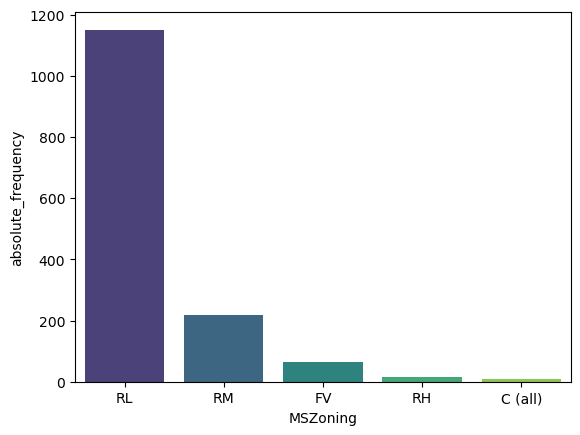

In [76]:
sns.barplot(
    x='MSZoning',
    y='absolute_frequency',
    data=df2,
    palette='viridis',
)
plt.show()

Using matplotlib, would just be:

```python
my_table.plot.bar()
```

**Insights** from the Bar Charts:

1. Both bar charts confirm the dominance of the `RL` zoning classification within the dataset. 
2. The bar representing `RL` is significantly taller than the others, emphasizing its higher frequency.
3. The two charts are identical, showcasing that both `value_counts()` and `pd.crosstab()` provide similar counts for the categories.

##### Countplots

A countplot is a type of bar plot in Seaborn that displays the count of occurrences of unique values in a categorical column.

Same result now as the *bar plot* since it just assumes Y axis is the count of frequencies. 

In [82]:
df2

,MSZoning,absolute_frequency,relative_frequency
0,RL,1151,0.79
1,RM,218,0.15
2,FV,65,0.04
3,RH,16,0.01
4,C (all),10,0.01


In [83]:
# El countplot se utiliza para cuando no tenemos la tabla hecha (df2), coge la tabla original y la representa

/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_49015/225497433.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


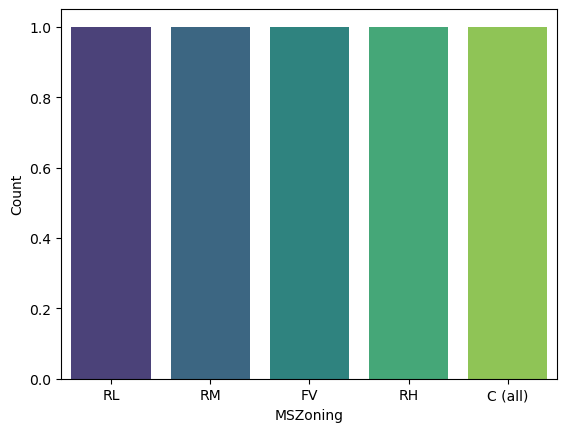

In [84]:
sns.countplot(
    x='MSZoning', 
    data=df2,                       #--> qué está mal?? # lo está haciendo sobre la tabla df2
    palette='viridis',
)
plt.ylabel('Count') # le puedes añadir labels personalizadas
plt.show()

/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_49015/3871205585.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


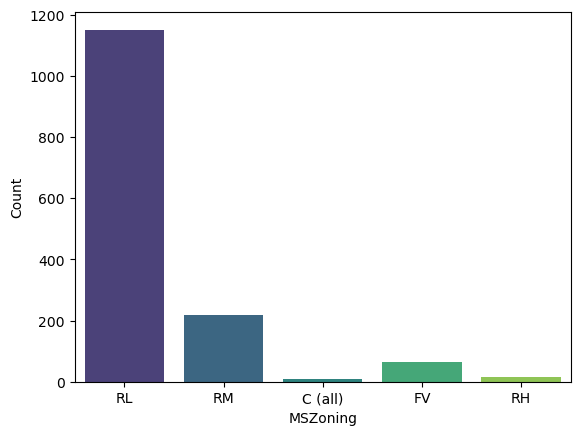

In [85]:
sns.countplot(
    x='MSZoning',
    data=df,                       # Si lo corregimos y ponemos el df original, ya lo ordena automáticamente
    palette='viridis',
)
plt.ylabel('Count') # le puedes añadir labels personalizadas
# Rotar etiquetas en el eje X
plt.xticks(rotation=45)  # Puedes cambiar el ángulo si es necesario
plt.show()


# lo está haciendo sobre los indices de MSZoning

##### Pie charts



Pie charts provide a circular representation of the data, showing the proportion of each category as slices of a pie. However, they can be challenging to interpret when there are many categories or when categories have similar proportions.

Seaborn, as of 2023, does not have a dedicated function for pie charts. Pie charts are more commonly created using `matplotlib`, which Seaborn is built upon.

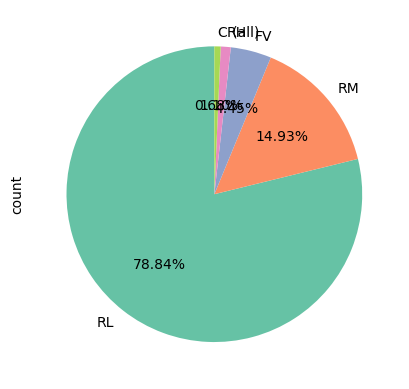

In [88]:
frequency_table.plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

In [89]:
# Sale muy feo, sería mirar los parametros para que los numeros esten fuera.

**Insights**:

- The pie chart provides a clear visual representation of the dominance of the 'RL' (Residential Low Density) zoning classification, occupying a significant portion of the chart.
- Other zoning types like 'RM', 'FV', 'RH', and 'C (all)' occupy much smaller slices, emphasizing the skewed distribution.
- While pie charts can illustrate proportions effectively, the dominance of 'RL' makes it somewhat challenging to discern differences between the smaller categories. This underscores why alternative visualizations, like bar charts, can sometimes be more informative for such distributions.

<h2 style="color: #008080;">Numerical Variables</h2>

Numerical variables are quantitative, and their values can be measured. Analyzing numerical data involves understanding its distribution, central tendency, and variability.


#### Summary Statistics

**Centrality and Dispersion Measures**

Let's start by getting some basic statistics on our dataset to understand its scale, centrality, and spread.


- The `.describe()` method provides key statistics for numerical columns (by default) in a dataframe, excluding NaN values; although it primarily targets numeric data, the `include` parameter allows for the selection of other data types.

In [95]:
num.describe().T.round(0) # con round (0) nos cargamos todos los decimales

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.0,422.0,1.0,366.0,730.0,1095.0,1460.0
LotFrontage,1201.0,70.0,24.0,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,10517.0,9981.0,1300.0,7554.0,9478.0,11602.0,215245.0
YearBuilt,1460.0,1971.0,30.0,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1460.0,1985.0,21.0,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1452.0,104.0,181.0,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1460.0,444.0,456.0,0.0,0.0,384.0,712.0,5644.0
BsmtFinSF2,1460.0,47.0,161.0,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1460.0,567.0,442.0,0.0,223.0,478.0,808.0,2336.0
TotalBsmtSF,1460.0,1057.0,439.0,0.0,796.0,992.0,1298.0,6110.0


From `describe()` we get:
- Measures of centrality: mean, median (indicated as 50%)
- Measures of dispersion: standard deviation (std), minimum, maximum, quartiles (Q1, Q2, Q3, indicated as 25%, 50%, and 75% respectively)

**Insights** from Summary Statistics for 'SalePrice':

- The average (mean) sale price of the houses in the dataset is approximately `$180.921`.

- The median sale price (middle value when sorted) stands at `$163.000`. Notably, the median is lower than the mean, suggesting a skew in the distribution of sale prices towards higher values.

- The standard deviation, a measure of the amount of variation or dispersion in the sale prices, is approximately `$79.442`. This indicates that sale prices can vary significantly from the average.

- The minimum and maximum sale prices are `$34.900` and `$755.000`, respectively, highlighting a wide range of property values in the dataset.

- The interquartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `$129.975` and `$214.000`. This means that 50% of the houses in the dataset were sold within this price range.

#### More Centrality and Dispersion Measures

Now, suppose we want to calculate individual statistical measures without using the `.describe()` method. Here are some ways to do it:

- `df[column].mean()`: Computes the mean of the selected column.
- `df[column].median()`: Calculates the median of the selected column.
- `df[column].mode()`: Identifies the mode of the selected column.
- `df[column].std()`: Determines the standard deviation of the selected column.
- `df[column].var()`: Computes the variance of the selected column.
- `df[column].min()`: Finds the minimum value in the selected column.
- `df[column].max()`: Finds the maximum value in the selected column.
- `df[column].count()`: Counts the number of non-NaN entries in the selected column.

In these examples, replace `column` with the name of the column you want to analyze.

For this section, we'll focus on 'SalePrice' as our numerical variable of interest, which represents the price at which the house was sold.

**Measures of Centrality**

In [102]:
num.SalePrice.mean()

180921.19589041095

In [103]:
num.SalePrice.median()

163000.0

In [104]:
num.SalePrice.mode()

0    140000
Name: SalePrice, dtype: int64

**Measures of Dispersion**

In [106]:
# quantiles ([])

num.SalePrice.quantile([0.3]).reset_index()

,index,SalePrice
0,0.3,135500.0


**Insights** from Measures of Centrality and Dispersion for 'SalePrice', for those metrics not calcualted in `describe()`:

- **Centrality**:
  - The most frequent (mode) sale price is $140,000. This value appears more frequently than any other price in the dataset.
  
- **Dispersion**:
  - The variance, a measure of how far each sale price in the set is from the mean, is approximately \(6,311,111,264\). A high variance implies that sale prices can be quite different from one another.
  - The range of sale prices is $720,100, calculated as the difference between the maximum and minimum prices. This wide range underscores the diversity in property prices within the dataset.

#### Shape of the Distribution

Skewness and kurtosis provide insights into the shape of the data distribution. Skewness indicates the asymmetry, and kurtosis tells about the "tailedness" or how peaked the distribution is.

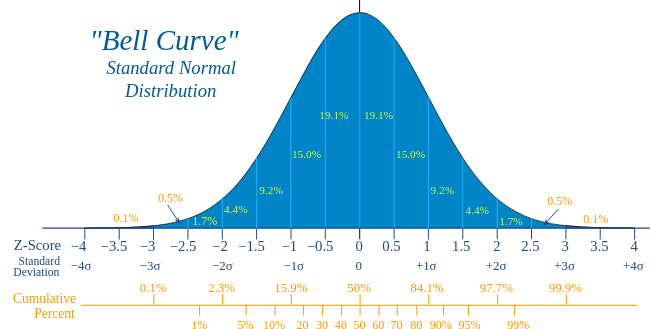

In [110]:
# skewness --> skew(): sesgo

num.SalePrice.skew().round(2)

1.88

- Skewness = 0: The distribution is perfectly symmetrical, resembling a normal distribution.
- Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.
- Skewness < 0: The distribution is negatively skewed (or left-skewed), meaning there is a longer tail on the left side of the distribution. The mass of the distribution is concentrated on the right of the figure.

In [112]:
# kurtosis --> kurtosis(): cuan de puntiaguda será la curva

num.SalePrice.kurtosis().round(2)

6.54

In [113]:
# Será puntiaguda, con la cola hacia la derecha. Lo comprobamos con el gráfico

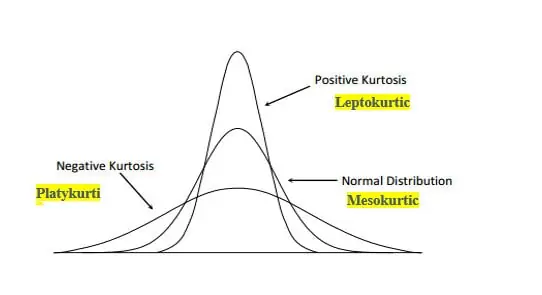

- Excess Kurtosis = 0 (or Kurtosis = 3 for non-excess): The distribution has the same kurtosis as a normal distribution, known as mesokurtic. It indicates a distribution with tails similar to the normal distribution.
- Excess Kurtosis > 0 (or Kurtosis > 3 for non-excess): The distribution is leptokurtic. It has fatter tails and a sharper peak than the normal distribution, indicating more extreme values (outliers) than expected in a normal distribution.
- Excess Kurtosis < 0 (or Kurtosis < 3 for non-excess): The distribution is platykurtic. It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.

- Skewness of 'SalePrice': \(1.88\)
- Kurtosis of 'SalePrice': \(6.54\)

**Insights**:

1. **Skewness**: The positive value of skewness (1.88) for the 'SalePrice' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of houses that are sold at higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 6.54 is greater than 3, which indicates that the 'SalePrice' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'SalePrice' than one would expect in a normally distributed set.

The skewness and kurtosis values suggest that there are some houses that are sold at significantly higher prices than the majority, and these are affecting the overall distribution of house prices in the dataset.

#### Visualizations

Visual tools like histograms and box plots offer insights into the distribution, variability, and potential outliers in numerical data.

##### Histograms

Histograms display the frequency distribution of a dataset. The height of each bar represents the number of data points in each bin.

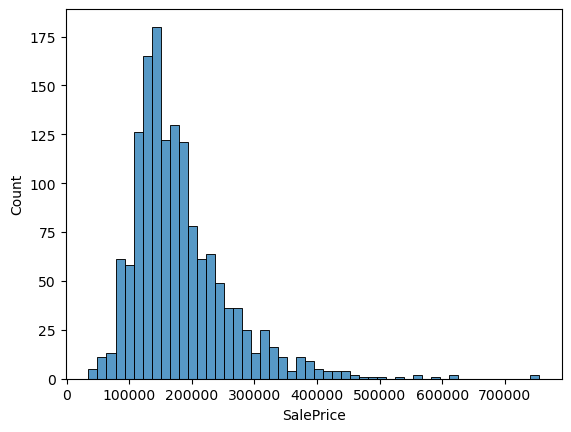

In [120]:
sns.histplot(num.SalePrice, bins=50)
plt.show()

In [121]:
# Significa que el 75% de las casas cuestan menos de 240.000€ (34.000 y 240.000€)

**Insights:**
- The histogram reveals that the majority of the houses are sold in the price range of approximately `$100,000` to `$250,000`. However, there's a long tail on the right side, confirming our earlier inference from the skewness value that there are houses sold at much higher prices. The Kernel Density Estimate (the smooth line) also shows the right-skewed nature of the distribution.

##### Box plots

Box plots, or whisker plots, showcase the central 50% of the data (interquartile range), potential outliers, and other statistical properties.

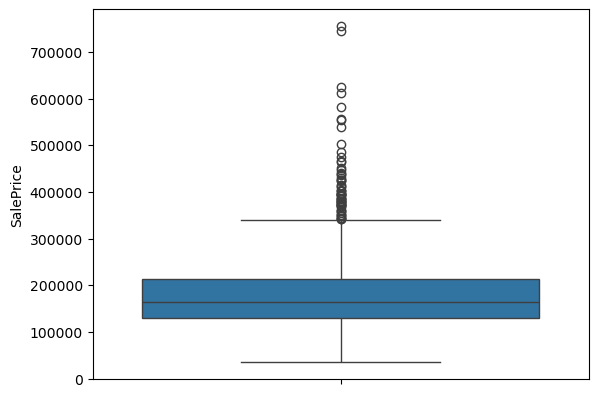

In [125]:
sns.boxplot(data=num.SalePrice)
plt.show()

In [126]:
# A partir de 350.000€ los cuenta como outliers.
# No sería recomendable cortar todos esos outliers!!!!! 
# NO NOS PODEMOS CARGAR TODO LO QUE ESTÁ DESPUÉS DEL BIGOTE 

In [127]:
# EJEMPLO DE CÓMO CORTAR OUTLIERS  df=df.SalePrice < 500000 !!!!!


**Insights:**
- The box plot gives us a visual representation of the central 50% of the data (the interquartile range) with the median price shown as a line inside the box. The whiskers extend to 1.5 times the interquartile range, and points outside of this range are considered outliers. As observed, there are several outlier points on the higher end of the sale prices, which aligns with our earlier insights about houses sold at significantly higher prices.

Both visualizations underscore the presence of outliers in the higher price range. These outliers might be luxury homes or properties in prime locations, and special attention might be needed when building predictive models, as these outliers can influence model performance.

In [129]:
# HAY MUCHAS COLUMNAS NO????

In [130]:
num.shape

(1460, 23)

### De nada, queridos ;)

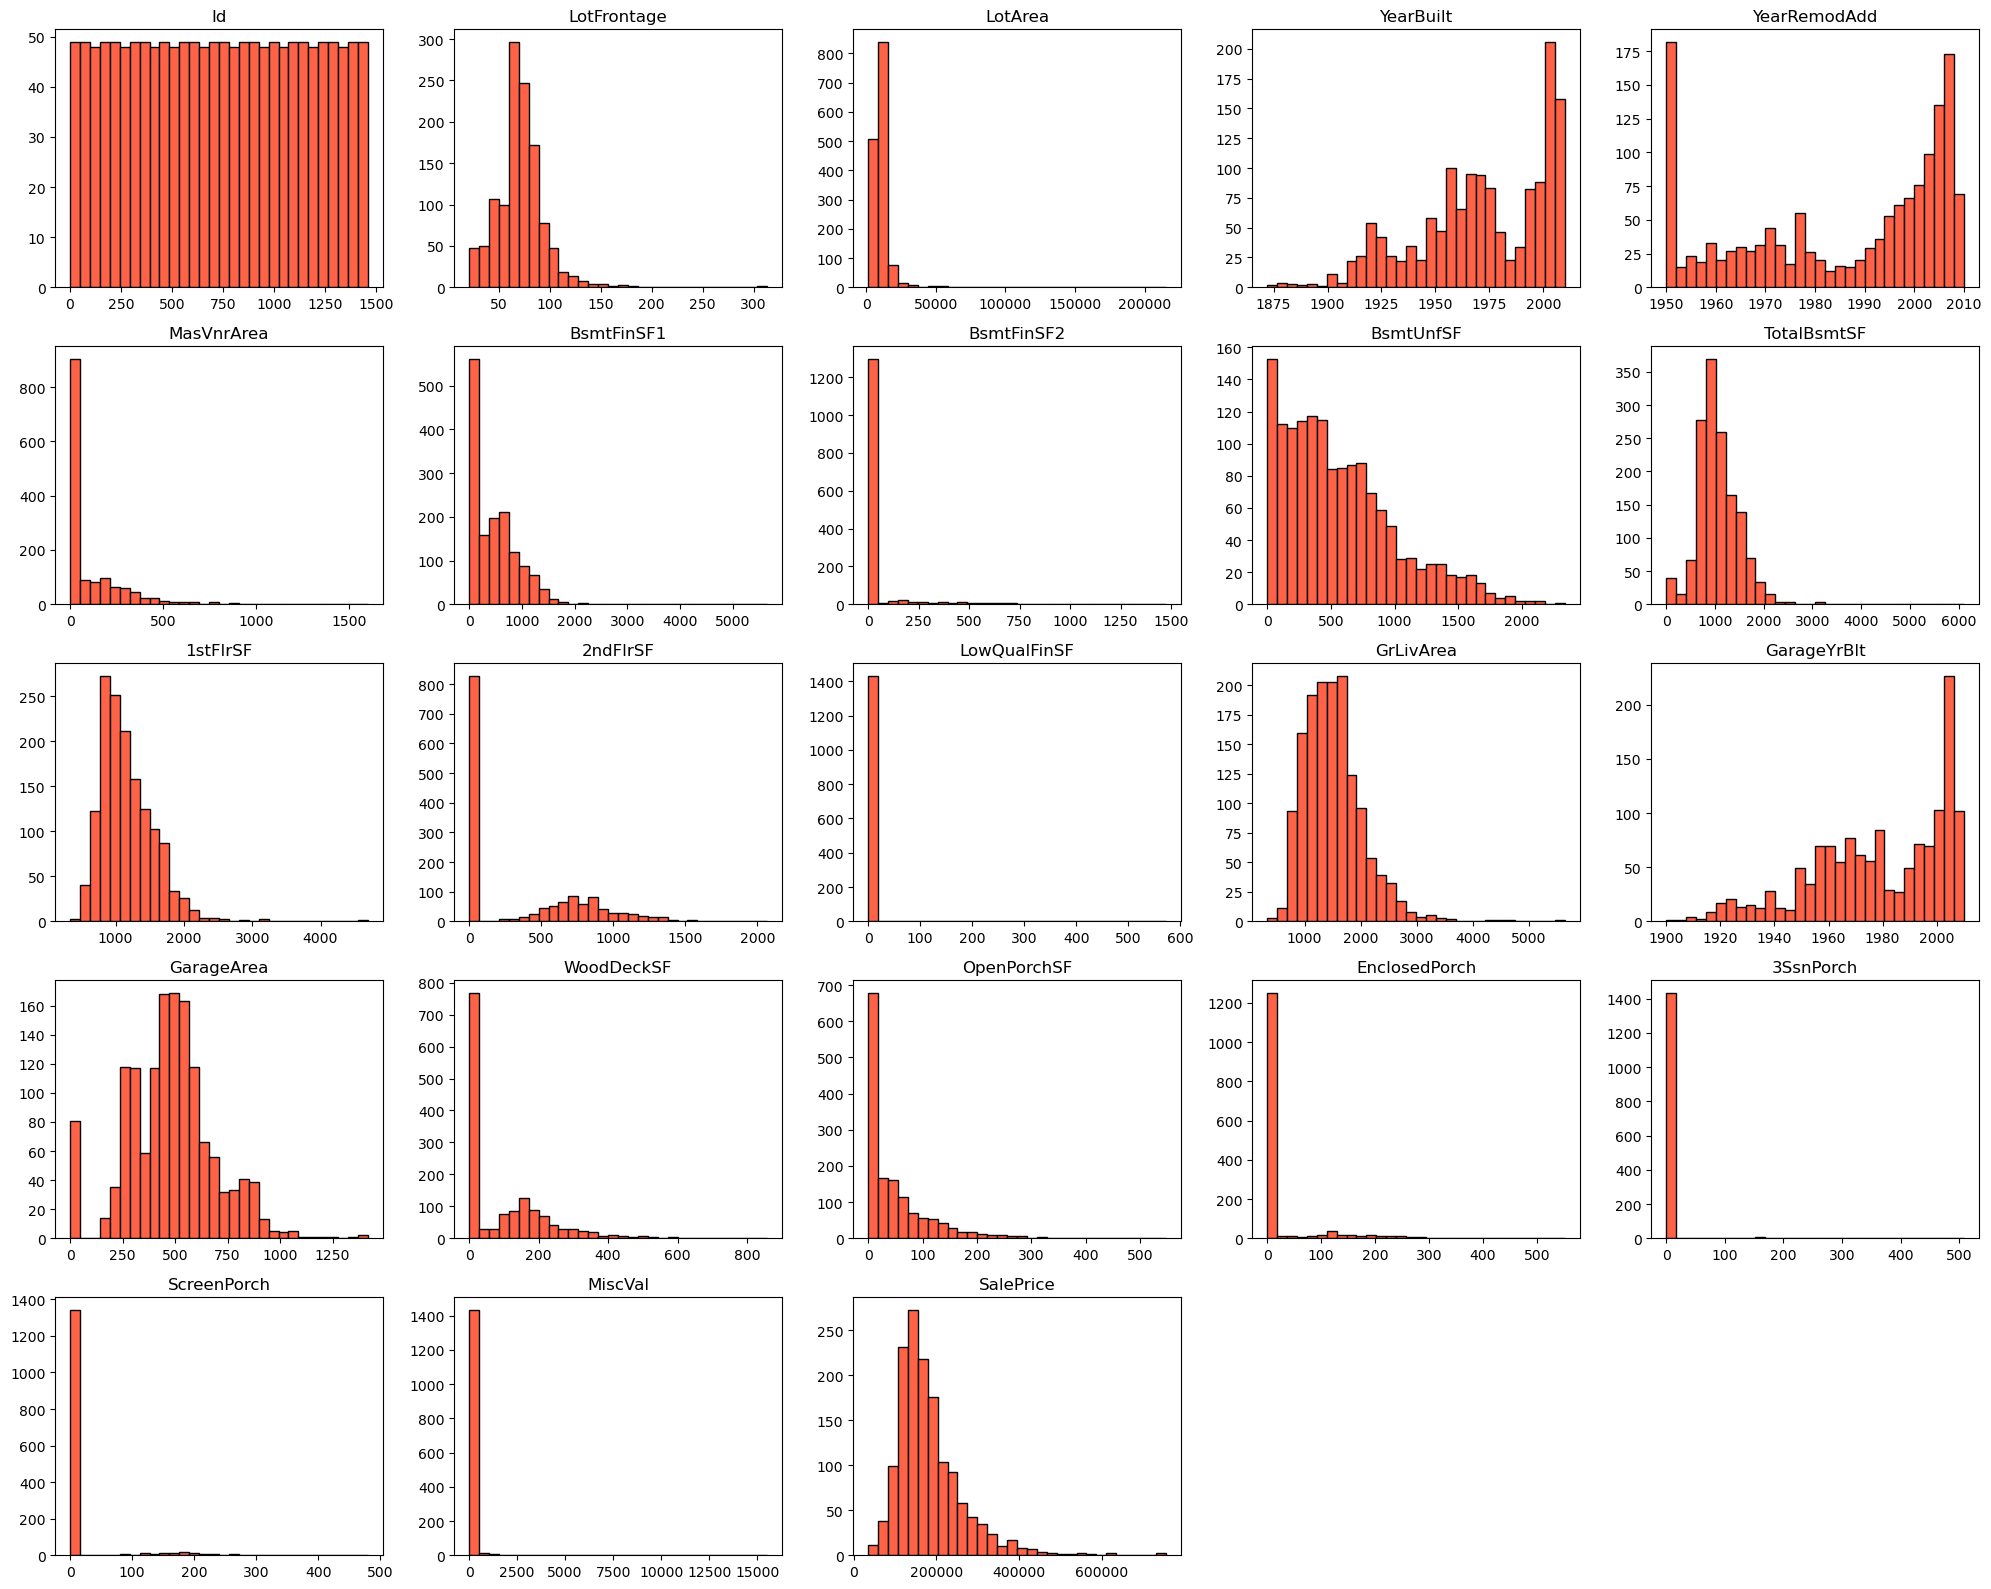

In [132]:
color = '#FF6347'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

In [133]:
# Hay muchas gráficas desbalanceadas.
# Habría que ir una a una analizando el por qué de cada gráfica rara

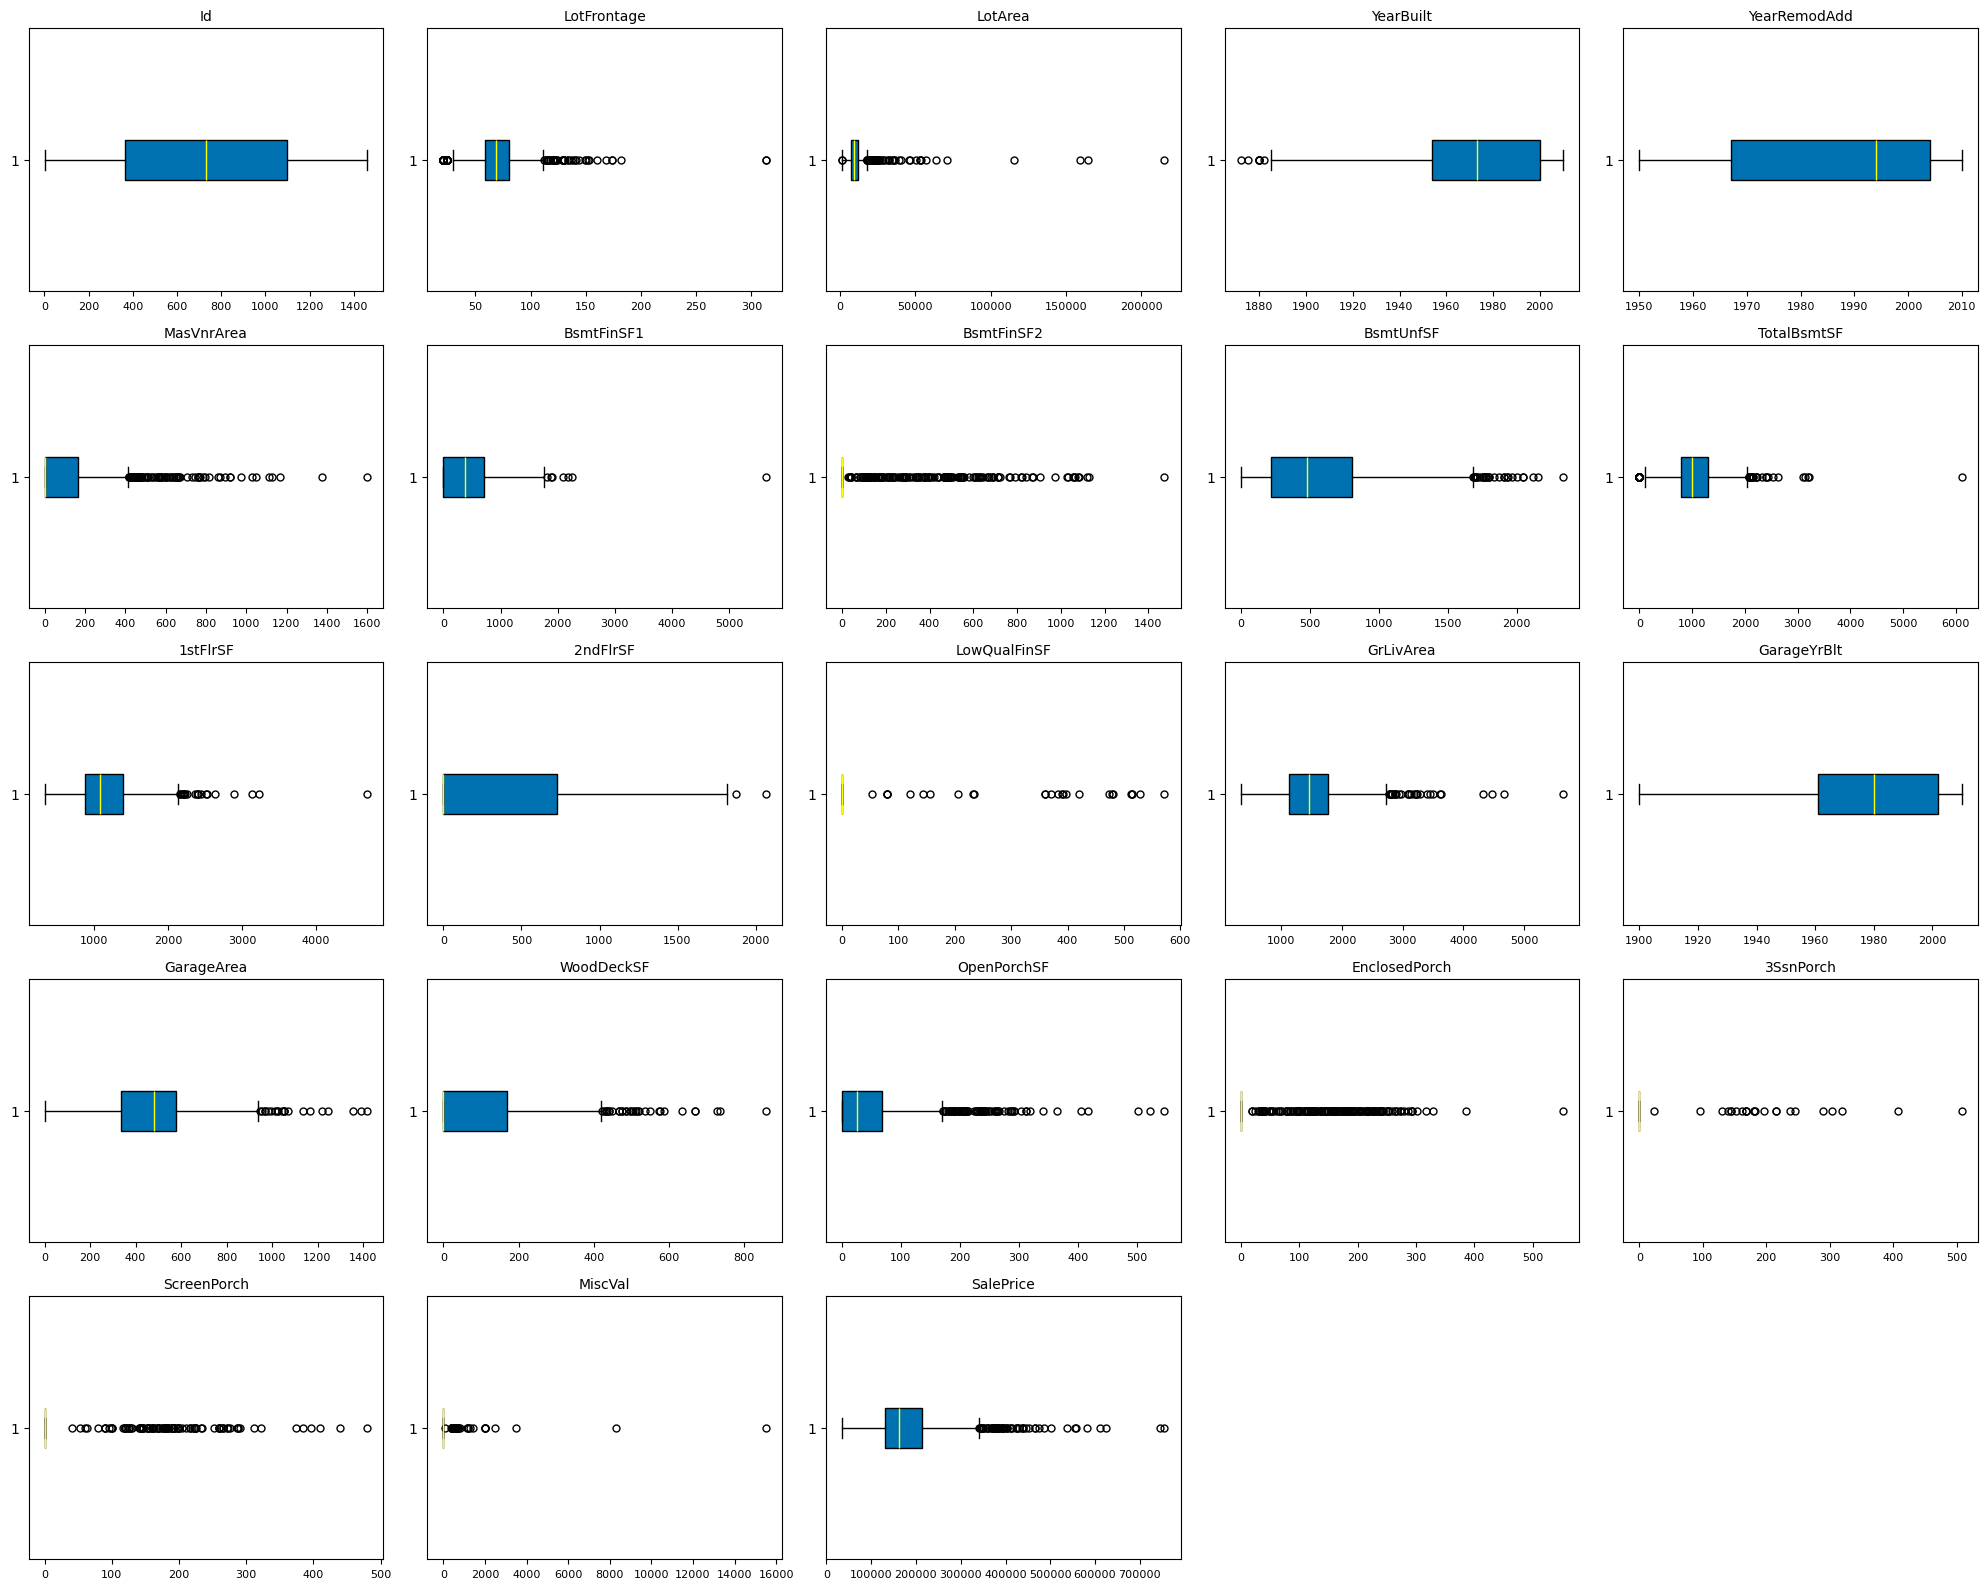

In [134]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

## Converting continuous to discrete variables: Discretization

Discretization is the process of converting continuous variables into discrete ones by creating a set of contiguous intervals (or bins) and then categorizing the variables into these intervals. This can be particularly useful when you want to categorize a continuous variable into different groups based on ranges. Note that we usually lose information in this process.

For our dataset, let's take the 'SalePrice' column, which is continuous, and discretize it into categories like 'Low', 'Medium', 'High', and 'Very High'.

In [137]:
# Discretizar = bining . De continuas a discretas

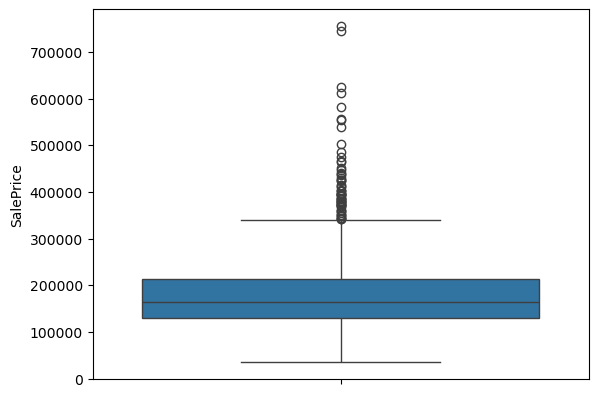

In [138]:
sns.boxplot(data=num.SalePrice)
plt.show()

In [139]:
bins = [0, 100000, 200000, 300000, df.SalePrice.max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['PriceMap'] = pd.cut(df.SalePrice, bins=bins, labels=labels) # La función cut hace el bining / mapeo del price en esos bins 
# pd.cut DISCRETIZAR UNA CONTINUA (BINNING)

freq = df['PriceMap'].value_counts() # Se define la variable de frecuencias con el value_counts()

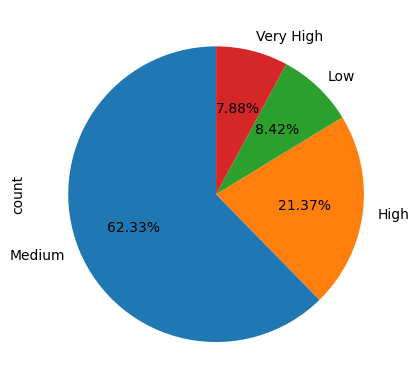

In [140]:
freq.plot.pie(autopct='%1.2f%%' ,startangle=90)
plt.show()

In [141]:
# El 62% tiene un precio medio.

Another useful option is **discretizing by quantiles**. This means dividing the data into intervals based on specific quantile values. This ensures that each bin has (approximately) the same number of data points. The `pandas` library provides a convenient method, `qcut()`, for this purpose.

Discretizing by quantiles can be particularly useful when you want to create categories that represent relative rankings (like low, medium, high, etc.) based on the distribution of the data, rather than fixed numeric ranges.

**Step 1**: Choose the number of quantiles (or bins). For example, if you want quartiles, you would choose 4 bins. 

**Step 2**: Use the `qcut()` function from `pandas`.

In [143]:
df['NEW'] = pd.qcut(df.SalePrice, q=4, labels=['Q1', 'Q2', 'Q3','Q4'])  # CUARTILES
# qcut corta por cuartil
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceMap,NEW
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,High,Q3
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Medium,Q3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,High,Q4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Medium,Q2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,High,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Medium,Q3
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,High,Q3
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,High,Q4
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,199

In the above code:
- `q=4` indicates that we want to divide the data into 4 quantiles (quartiles).
- `labels=['Q1', 'Q2', 'Q3', 'Q4']` provides custom labels for each quantile bin.

The resulting 'SalePrice_quantile' column will categorize each house's sale price into one of the four quartiles.

By discretizing 'SalePrice', we have transformed a continuous variable into categorical bins. This can simplify the analysis by grouping houses into broad price categories. For example, you can now easily analyze the number of houses in each price range or determine if certain features are more common in high-priced houses compared to low-priced ones.

### 💡 Check for understanding

Discretize the '1stFlrSF' column (first-floor square feet) into three categories: 'Small', 'Medium', 'Large'. Set the bins such that 'Small' includes sizes up to the 33rd percentile, 'Medium' includes sizes from the 33rd to the 66th percentile, and 'Large' includes sizes from the 66th percentile onward. How many houses fall into each category?

In [148]:
# Your code goes here
df['1_Floor'] = pd.qcut(df["1stFlrSF"], q=3, labels=['Small', 'Medium', 'Big']) # TERCILES
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceMap,NEW,1_Floor
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,High,Q3,Small
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Medium,Q3,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,High,Q4,Small
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Medium,Q2,Medium
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,High,Q4,Medium


<Axes: ylabel='count'>

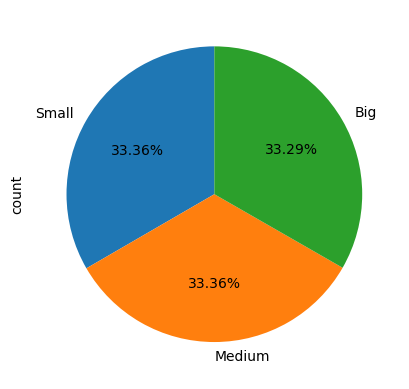

In [149]:
cuartil_freq = df['1_Floor'].value_counts() # Se define la variable de frecuencias con el value_counts()
cuartil_freq.plot.pie(autopct='%1.2f%%' ,startangle=90)

## Summary

In this lesson, we've conducted a comprehensive univariate analysis:

- For **categorical variables**, we visualized the distribution of our zoning classifications with bar and pie charts, backed by frequency tables.
- For **numerical variables**, we explored the central tendencies, dispersions and shape of distribution of our sale prices, visualized through histograms and box plots.

This analysis allows us to deeply understand each variable, laying a strong foundation for subsequent multivariate analyses.

## 💡 Check for understanding

**Scenario**:
Given the 'TotRmsAbvGrd' column (total rooms above ground), let's dive deep into its univariate characteristics.

**Tasks**:

1. **Data Aggregation**:
    - Create a frequency table for 'TotRmsAbvGrd' to understand the distribution of the number of rooms in houses.
    - Calculate the mean, median, mode, variance, and standard deviation of 'TotRmsAbvGrd'.

2. **Visualization**:
    - Plot a histogram for 'TotRmsAbvGrd' to understand its distribution.
    - Plot a box plot for 'TotRmsAbvGrd' to visualize its central tendency, spread, and potential outliers.

3. **Interpretation**:
    - Is the distribution of the number of rooms skewed? If so, in which direction?
    - Based on the histogram and box plot, what can you infer about the common number of rooms above ground in houses? 
    - Are there any noticeable outliers in the number of rooms? If so, are there more houses with unusually many rooms or unusually few?


In [153]:
# Your code goes here
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceMap,NEW,1_Floor
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,High,Q3,Small
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Medium,Q3,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,High,Q4,Small
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Medium,Q2,Medium
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,High,Q4,Medium


In [157]:
freq_table = df.TotRmsAbvGrd.value_counts()
freq_table

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [159]:
df.TotRmsAbvGrd.mean()

6.517808219178082

In [161]:
df.TotRmsAbvGrd.mode()

0    6
Name: TotRmsAbvGrd, dtype: int64

In [163]:
df.TotRmsAbvGrd.median()

6.0

In [165]:
df.TotRmsAbvGrd.std()

1.625393290584064

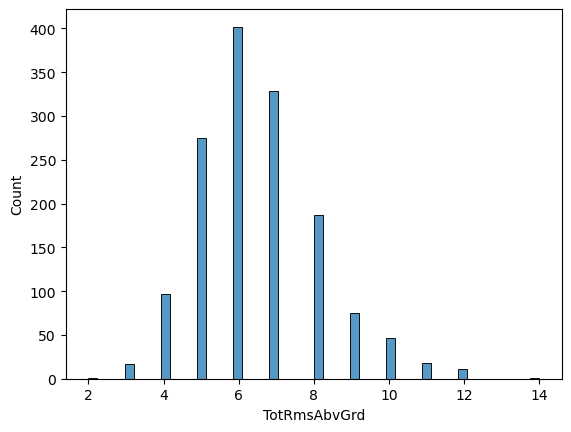

In [167]:
sns.histplot(df.TotRmsAbvGrd, bins=50)
plt.show() # un histograma no se utiliza para una variable categorica

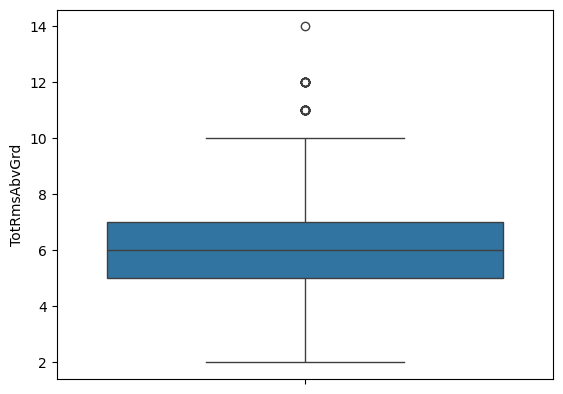

In [169]:
sns.boxplot(data=df.TotRmsAbvGrd)
plt.show()

In [ ]:
# Yes, it is a little bit skew to the rigth, due to the outliers present 
# Based on the histogram and box plot, we can infer that the common number of rooms above is 6
# Yes, there are noticeable outliers in the number of rooms, which stand to 11, 12 and 14 rooms in each house
# There are more houses with unusually many rooms than unusually few rooms